# NETFLIX DATASET ANALYSIS


# Objective:

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries.

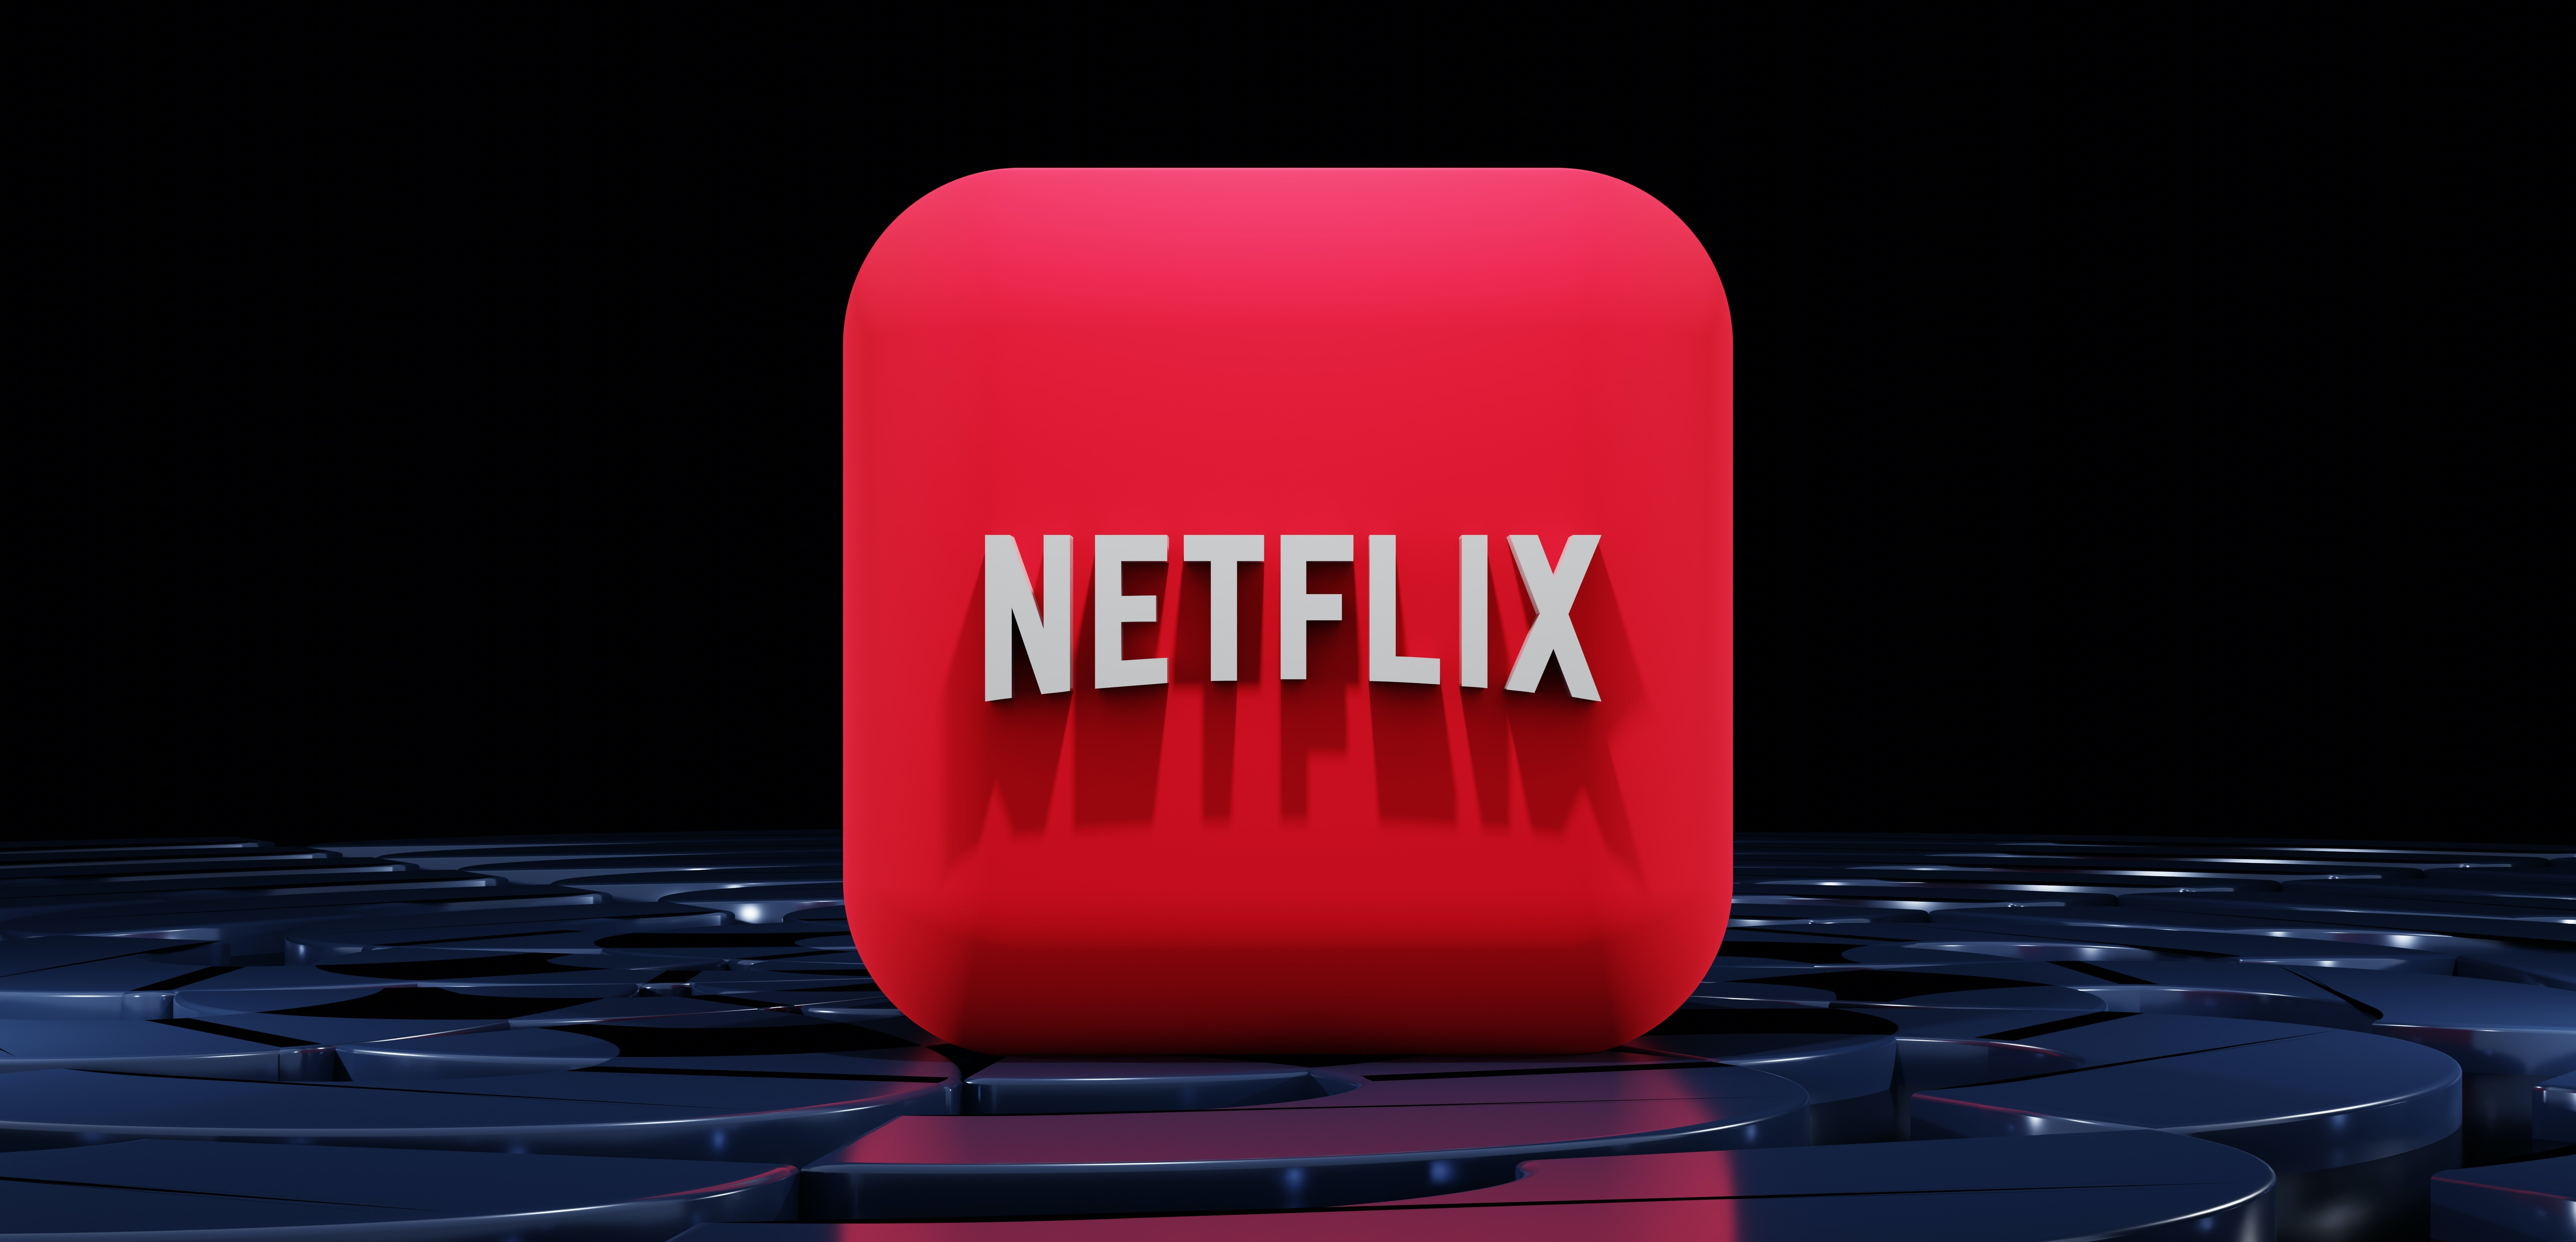

# Dataset Information:
* Netflix is one of the most popular media and video streaming platforms.They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. 
* This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Source:

Please check the description at: [Dataset Link](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv)




### Feature Information:
* **Show_id:** Unique ID for every Movie / Tv Show
* **Type:** Identifier - A Movie or TV Show
* **Title:** Title of the Movie / Tv Show
* **Director:** Director of the Movie
* **Cast:** Actors involved in the movie/show
* **Country:** Country where the movie/show was produced
* **Date_added:** Date it was added on Netflix
* **Release_year:** Actual Release year of the movie/show
* **Rating:** TV Rating of the movie/show
* **Duration:** Total Duration - in minutes or number of seasons
* **Listed_in:** Genre
* **Description:** The summary description

# Loading the Dataset:
For exploring and analysing first we import the Python libraries like numpy,pandas,matplotlib,Seaborn,wordcloud and then import the dataset and save it in a dataframe "data".

In [1046]:
# Importing Python Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [1047]:
# loading the dataset

data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [1048]:
data.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [1049]:
data.tail(3)

show_id   type       title         director  \
8804   s8805  Movie  Zombieland  Ruben Fleischer   
8805   s8806  Movie        Zoom     Peter Hewitt   
8806   s8807  Movie      Zubaan      Mozez Singh   

                                                   cast        country  \
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

            date_added  release_year rating duration  \
8804  November 1, 2019          2009      R   88 min   
8805  January 11, 2020          2006     PG   88 min   
8806     March 2, 2019          2015  TV-14  111 min   

                                           listed_in  \
8804                         Comedies, Horror Movies   
8805              Children & Family Movies, Comedies   
8806  Dramas, International Movies, Music & Musicals   

                                            description  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...

In [1050]:
data.shape

(8807, 12)

# Basic Exploration of Data:

In [1051]:
# getting the column names

data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [1052]:
# renaming the column 'release_year' to 'release_date' & 'listed_in' to 'genre'

data.rename(columns = {'release_year': 'release_date', 'listed_in': 'genre'}, inplace = True)

In [1053]:
# dropping the column 'description'

data.drop(columns = ['description'], inplace = True)

In [1054]:
# checking for the dtypes of columns

data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_date     int64
rating          object
duration        object
genre           object
dtype: object

In [1055]:
# To change the dtype of column 'date_added'

# data['date_added'] = pd.to_datetime(data['date_added'].str.strip(), format = "%B %d, %Y")

data['date_added'] = pd.to_datetime(data['date_added'].str.replace(" ",""), format = "%B%d,%Y")

In [1056]:
# To change the dtype of column 'release_date'

data['release_date'] = pd.to_datetime(data['release_date'], format = '%Y')

In [1057]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_date    datetime64[ns]
rating                  object
duration                object
genre                   object
dtype: object

In [1058]:
# creating new columns 'year_added', 'month added', 'release_year' and 'release_month'

data['date_added'] = pd.to_datetime(data['date_added'].dt.date)

data['year_added'] = data['date_added'].dt.strftime('%Y')
data['month_added'] = data['date_added'].dt.strftime('%B')

data['release_date'] = pd.to_datetime(data['release_date'].dt.date)

data['release_year'] = data['release_date'].dt.strftime('%Y')
data['release_month'] = data['release_date'].dt.strftime('%B')

In [1059]:
# Checking the value_counts of 'rating' column

data['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [1060]:
data[data['rating'].isin(['74 min', '84 min', '66 min'])]

show_id   type                                 title    director  \
5541   s5542  Movie                       Louis C.K. 2017  Louis C.K.   
5794   s5795  Movie                 Louis C.K.: Hilarious  Louis C.K.   
5813   s5814  Movie  Louis C.K.: Live at the Comedy Store  Louis C.K.   

            cast        country date_added release_date  rating duration  \
5541  Louis C.K.  United States 2017-04-04   2017-01-01  74 min      NaN   
5794  Louis C.K.  United States 2016-09-16   2010-01-01  84 min      NaN   
5813  Louis C.K.  United States 2016-08-15   2015-01-01  66 min      NaN   

       genre year_added month_added release_year release_month  
5541  Movies       2017       April         2017       January  
5794  Movies       2016   September         2010       January  
5813  Movies       2016      August         2015       January

In [1061]:
# dropping the rows where rating is in (74 min', '84 min', '66 min') to avoid the typo error

data.drop(data[data['rating'].isin(['74 min', '84 min', '66 min'])].index, inplace = True)
data.shape

(8804, 15)

In [1062]:
# checking for duplicate rows

data.duplicated().sum()

0

In [1063]:
# checking for number of unique values in each column

data.nunique()

show_id          8804
type                2
title            8804
director         4527
cast             7691
country           748
date_added       1714
release_date       74
rating             14
duration          220
genre             514
year_added         14
month_added        12
release_year       74
release_month       1
dtype: int64

In [1064]:
# checking for number of null values in each column

data.isna().sum()

show_id             0
type                0
title               0
director         2634
cast              825
country           831
date_added         10
release_date        0
rating              4
duration            0
genre               0
year_added         10
month_added        10
release_year        0
release_month       0
dtype: int64

# Unnesting the columns:
    For further analysis, we have to unnest the columns 'director','cast','country' and 'genre'.

In [1065]:
# unnesting the directors column & created a new DataFrame df1 with columns 'title' and 'director'

constraint1 = data['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(constraint1, index=data['title'])
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'director'}, inplace=True)
df1.drop(['level_1'], axis=1, inplace=True)
df1.head()

title         director
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              nan
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              nan
4           Kota Factory              nan

In [1066]:
# unnesting the cast column & created a new DataFrame df2 with columns 'title' and 'cast'

constraint2 = data['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(constraint2, index=data['title'])
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'cast'}, inplace=True)
df2.drop(['level_1'], axis=1, inplace=True)
df2.head()

title            cast
0  Dick Johnson Is Dead             nan
1         Blood & Water      Ama Qamata
2         Blood & Water     Khosi Ngema
3         Blood & Water   Gail Mabalane
4         Blood & Water  Thabang Molaba

In [1067]:
# unnesting the country column & created a new DataFrame df3 with columns 'title' and 'country'

constraint3 = data['country'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(constraint3, index=data['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'country'}, inplace=True)
df3.drop(['level_1'], axis=1, inplace=True)
df3.head()

title        country
0   Dick Johnson Is Dead  United States
1          Blood & Water   South Africa
2              Ganglands            nan
3  Jailbirds New Orleans            nan
4           Kota Factory          India

In [1068]:
# unnesting the genre column & created a new DataFrame df1 with columns 'title' and 'genre'

constraint4 = data['genre'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(constraint4, index=data['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'genre'}, inplace=True)
df4.drop(['level_1'], axis=1, inplace=True)
df4.head()

title                   genre
0  Dick Johnson Is Dead           Documentaries
1         Blood & Water  International TV Shows
2         Blood & Water               TV Dramas
3         Blood & Water            TV Mysteries
4             Ganglands          Crime TV Shows

In [1069]:
# filtering the unnested columns of dataframe 'data' and create a new dataframe 'filtered_data'

filtered_data = data[['show_id','type','title','date_added','release_date','rating','duration', 'year_added', 'month_added', 'release_year', 'release_month']]

In [1070]:
filtered_data.head(3)

show_id     type                 title date_added release_date rating  \
0      s1    Movie  Dick Johnson Is Dead 2021-09-25   2020-01-01  PG-13   
1      s2  TV Show         Blood & Water 2021-09-24   2021-01-01  TV-MA   
2      s3  TV Show             Ganglands 2021-09-24   2021-01-01  TV-MA   

    duration year_added month_added release_year release_month  
0     90 min       2021   September         2020       January  
1  2 Seasons       2021   September         2021       January  
2   1 Season       2021   September         2021       January

In [1071]:
filtered_data.shape

(8804, 11)

# Merging the DataFrames:
We will merge the DataFrames filtered_data, df1, df2, df3, df4 to create a new DataFrame data_final.

In [1072]:
# merging DataFrames df1 and df2 and save it to a new DataFrame data1

data1 = pd.merge(df2, df1, how = 'inner', on = 'title')

In [1073]:
# merging DataFrames data1 and df3 and save it to a new DataFrame data2

data2 = pd.merge(data1, df3, how = 'inner', on = 'title')

In [1074]:
# merging DataFrames data2 and df4 and save it to a new DataFrame data3

data3 = pd.merge(data2, df4, how = 'inner', on = 'title')

In [1075]:
# merging DataFrames data3 and filtered_data and save it to a new DataFrame data_final

data_final = pd.merge(data3, filtered_data, how = 'inner', on = 'title')

In [1076]:
data_final.head()

title         cast         director        country  \
0  Dick Johnson Is Dead          nan  Kirsten Johnson  United States   
1         Blood & Water   Ama Qamata              nan   South Africa   
2         Blood & Water   Ama Qamata              nan   South Africa   
3         Blood & Water   Ama Qamata              nan   South Africa   
4         Blood & Water  Khosi Ngema              nan   South Africa   

                    genre show_id     type date_added release_date rating  \
0           Documentaries      s1    Movie 2021-09-25   2020-01-01  PG-13   
1  International TV Shows      s2  TV Show 2021-09-24   2021-01-01  TV-MA   
2               TV Dramas      s2  TV Show 2021-09-24   2021-01-01  TV-MA   
3            TV Mysteries      s2  TV Show 2021-09-24   2021-01-01  TV-MA   
4  International TV Shows      s2  TV Show 2021-09-24   2021-01-01  TV-MA   

    duration year_added month_added release_year release_month  
0     90 min       2021   September         2020       January  
1  2 Seasons       2021   September         2021       January  
2  2 Seasons       2021   September         2021       January  
3  2 Seasons       2021   September         2021       January  
4  2 Seasons       2021   September         2021       January

In [1077]:
data_final.shape

(201988, 15)

In [1078]:
# checking for the number of duplicate rows in data_final

data_final.duplicated().sum()

55

In [1079]:
# removing the duplicate rows from data_final

data_final.drop_duplicates(inplace = True)

In [1080]:
# after removing duplicate rows, checking the number of duplicate rows in data_final

data_final.duplicated().sum()

0

In [1081]:
# reseting index after dropping duplicate rows
data_final.reset_index(drop = True)

title                   cast         director  \
0       Dick Johnson Is Dead                    nan  Kirsten Johnson   
1              Blood & Water             Ama Qamata              nan   
2              Blood & Water             Ama Qamata              nan   
3              Blood & Water             Ama Qamata              nan   
4              Blood & Water            Khosi Ngema              nan   
...                      ...                    ...              ...   
201928                Zubaan         Anita Shabdish      Mozez Singh   
201929                Zubaan         Anita Shabdish      Mozez Singh   
201930                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201931                Zubaan  Chittaranjan Tripathy      Mozez Singh   
201932                Zubaan  Chittaranjan Tripathy      Mozez Singh   

              country                   genre show_id     type date_added  \
0       United States           Documentaries      s1    Movie 2021-09-25   
1        South Africa  International TV Shows      s2  TV Show 2021-09-24   
2        South Africa               TV Dramas      s2  TV Show 2021-09-24   
3        South Africa            TV Mysteries      s2  TV Show 2021-09-24   
4        South Africa  International TV Shows      s2  TV Show 2021-09-24   
...               ...                     ...     ...      ...        ...   
201928          India    International Movies   s8807    Movie 2019-03-02   
201929          India        Music & Musicals   s8807    Movie 2019-03-02   
201930          India                  Dramas   s8807    Movie 2019-03-02   
201931          India    International Movies   s8807    Movie 2019-03-02   
201932          India        Music & Musicals   s8807    Movie 2019-03-02   

       release_date rating   duration year_added month_added release_year  \
0        2020-01-01  PG-13     90 min       2021   September         2020   
1        2021-01-01  TV-MA  2 Seasons       2021   September         2021   
2        2021-01-01  TV-MA  2 Seasons       2021   September         2021   
3        2021-01-01  TV-MA  2 Seasons       2021   September         2021   
4        2021-01-01  TV-MA  2 Seasons       2021   September         2021   
...             ...    ...        ...        ...         ...          ...   
201928   2015-01-01  TV-14    111 min       2019       March         2015   
201929   2015-01-01  TV-14    111 min       2019       March         2015   
201930   2015-01-01  TV-14    111 min       2019       March         2015   
201931   2015-01-01  TV-14    111 min       2019       March         2015   
201932   2015-01-01  TV-14    111 min       2019       March         2015   

       release_month  
0            January  
1            January  
2            January  
3            January  
4            January  
...              ...  
201928       January  
201929       January  
201930       January  
201931       January  
201932       January  

[201933 rows x 15 columns]

In [1082]:
# after removing duplicate rows, finding the shape of data_final

data_final.shape

(201933, 15)

In [1083]:
# getting columns in data_final

data_final.columns

Index(['title', 'cast', 'director', 'country', 'genre', 'show_id', 'type',
       'date_added', 'release_date', 'rating', 'duration', 'year_added',
       'month_added', 'release_year', 'release_month'],
      dtype='object')

In [1084]:
# checking the number of unique values in columns in data_final

data_final.nunique()

title             8804
cast             36440
director          4993
country            128
genre               42
show_id           8804
type                 2
date_added        1714
release_date        74
rating              14
duration           220
year_added          14
month_added         12
release_year        74
release_month        1
dtype: int64

In [1085]:
# copy the DataFrame 'data_final' and save it into "df"

df = data_final.copy()

In [1086]:
df.head(3)

title        cast         director        country  \
0  Dick Johnson Is Dead         nan  Kirsten Johnson  United States   
1         Blood & Water  Ama Qamata              nan   South Africa   
2         Blood & Water  Ama Qamata              nan   South Africa   

                    genre show_id     type date_added release_date rating  \
0           Documentaries      s1    Movie 2021-09-25   2020-01-01  PG-13   
1  International TV Shows      s2  TV Show 2021-09-24   2021-01-01  TV-MA   
2               TV Dramas      s2  TV Show 2021-09-24   2021-01-01  TV-MA   

    duration year_added month_added release_year release_month  
0     90 min       2021   September         2020       January  
1  2 Seasons       2021   September         2021       January  
2  2 Seasons       2021   September         2021       January

# Checking for Missing values:
isnull() returns True if the cell contains a missing value and False otherwise. However, since the dataset is large, it is impractical for us to manually check all True, False values. Therefore, we will try to get a summary of the missing values in the dataset as follows.

In [1087]:
# checking the number of null values in columns in df

df.isna().sum()

title              0
cast               0
director           0
country            0
genre              0
show_id            0
type               0
date_added       158
release_date       0
rating            67
duration           0
year_added       158
month_added      158
release_year       0
release_month      0
dtype: int64

In [1088]:
# filling the null values of columns 'date_added' ,'year_added' and 'month_added' for type: Movies and TV Shows

df['date_added'] = df.groupby('type')['date_added'].fillna(method='bfill')
df['year_added'] = df.groupby('type')['year_added'].fillna(method='bfill')
df['month_added'] = df.groupby('type')['month_added'].fillna(method='bfill')

In [1089]:
# filling the null values of columns 'rating', 'duration', 'director', 'cast', 'country' in DataFrame 'df'

df['rating'].fillna('Unknown Rating', inplace = True)
df['duration'].fillna('Unknown Duration', inplace = True)
df['director'].fillna('Unknown Director', inplace = True)
df['cast'].fillna('Unknown Actor', inplace = True)
df['country'].fillna('Unknown Country', inplace = True)

In [1090]:
# checking the number of null values in columns in df

df.isna().sum()

title            0
cast             0
director         0
country          0
genre            0
show_id          0
type             0
date_added       0
release_date     0
rating           0
duration         0
year_added       0
month_added      0
release_year     0
release_month    0
dtype: int64

In [1091]:
# checking the statistical summary of data in the DataFrame 'df'

df.describe(include = 'all')

title    cast director        country   genre  \
count                        201933  201933   201933         201933  201933   
unique                         8804   36440     4993            128      42   
top     Kahlil Gibran's The Prophet     nan      nan  United States  Dramas   
freq                            700    2146    50643          59321   29756   
first                           NaN     NaN      NaN            NaN     NaN   
last                            NaN     NaN      NaN            NaN     NaN   

       show_id    type           date_added         release_date  rating  \
count   201933  201933               201933               201933  201933   
unique    8804       2                 1714                   74      15   
top      s7165   Movie  2020-01-01 00:00:00  2018-01-01 00:00:00   TV-MA   
freq       700  145785                 3748                24413   73819   
first      NaN     NaN  2008-01-01 00:00:00  1925-01-01 00:00:00     NaN   
last       NaN     NaN  2021-09-25 00:00:00  2021-01-01 00:00:00     NaN   

        duration year_added month_added release_year release_month  
count     201933     201933      201933       201933        201933  
unique       220         14          12           74             1  
top     1 Season       2019        July         2018       January  
freq       35035      46916       20286        24413        201933  
first        NaN        NaN         NaN          NaN           NaN  
last         NaN        NaN         NaN          NaN           NaN

# Feature Analysis and Data Visualization:

We have two DataFrames.One is 'data'(with nested columns) and other one is 'df' (with unnested columns).For analysis, we use both the DataFrames based on the exploration. 

## 1. Counts of categorical variable both using graphical and nongraphical analysis:

#### a. Number of Movies vs. TV Shows:

In [1092]:
titles_per_type = data['type'].value_counts()
titles_per_type

Movie      6128
TV Show    2676
Name: type, dtype: int64

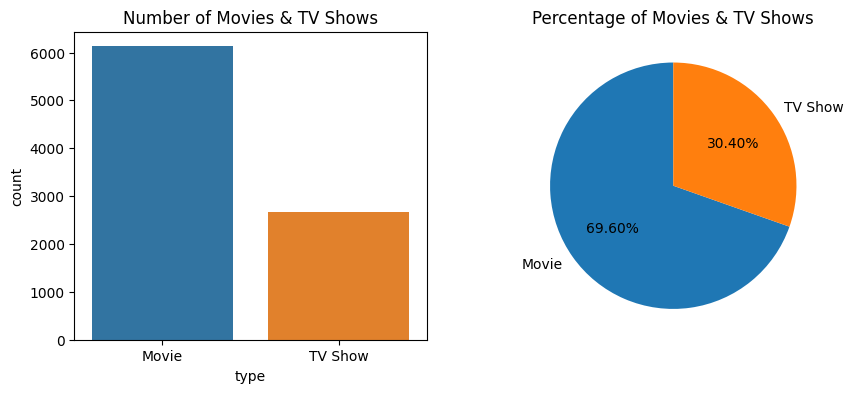

In [835]:
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
sns.countplot(data = data, x = 'type')
plt.title("Number of Movies & TV Shows")

plt.subplot(1,2,2)
plt.pie(titles_per_type, labels = titles_per_type.index, startangle = 90, autopct='%1.2f%%')
plt.title("Percentage of Movies & TV Shows")

plt.show()

* There are total 8804 number of titles out of which 6128(69.6%) are movies and 2676(30.4%) are TV Shows. 

#### b. Duration of Movies vs. TV Shows:

In [836]:
data[data['type'] == 'Movie']['duration'].value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [837]:
temp = data[data['type'] == 'Movie']['duration'].str.split(pat = " ").to_frame()

lst = []
# Iterating through the split duration strings and extract the numerical part
for i in range(len(temp)):
    l = temp.iloc[i][0]
    if isinstance(l, list) and len(l) > 0:
        val = int(l[0])
        lst.append(val)
# print(lst)


# Calculating the maximum and minimum durations
print('maximum duration: ', max(lst), 'minutes')
print('minimun duration: ', min(lst), 'minutes')

maximum duration:  312 minutes
minimun duration:  3 minutes


* The movies duration are in miutes and there are 205 different type of durations for movies.
* Maximum number of movies have durations between 90-97 minutes.
* The maximum and minimum duration of movies are 312 and 3 minutes respectively.

In [838]:
data[data['type'] == 'TV Show']['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

* The TV Shows durations are in seasons and there are 15 different type durations for TV Shows.
* 1 season TV Shows are highest in number.
* 2 seasons TV Shows are almost 1/4th of the number of 1 season TV Shows and 3 seasons TV Shows are almost half of the number of 2 seasons TV Shows.
* There are maximum and minimum duration for TV Shows are 17 seasons and 1 season respectively.

#### c. Rating of Movies vs. TV Shows:

In [839]:
data['type'].value_counts()

Movie      6128
TV Show    2676
Name: type, dtype: int64

In [840]:
data[data['type'] == 'Movie']['rating'].value_counts()

TV-MA       2062
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
Name: rating, dtype: int64

In [841]:
data[data['type'] == 'TV Show']['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

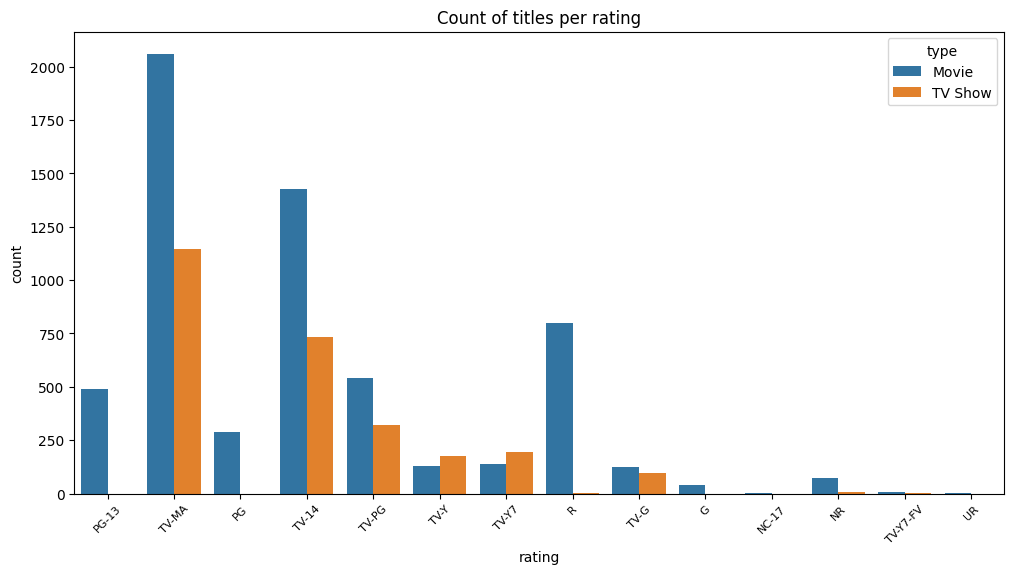

In [842]:
plt.figure(figsize = (12,6))
sns.countplot(data = data, x = 'rating', hue = 'type')
plt.xticks(rotation = 45, fontsize = 8)
plt.title("Count of titles per rating")
plt.show()

* There are 6128 numberof movies and 2676 TV Shows.
* The top 5 ratings are TV-MA, TV-14, R, TV-PG, PG-13 for movies.
* The top 5 ratings are TV-MA, TV_14, TV-PG, TV-Y7, TV-Y for TV Shows.
* Out of total movies, 33% of the movies have rating TV-MA(Mature Audience only) which is highest in number, 23% of movies have rating TV-14(unsuitable for children under age 14) , 12% have rating R(restricted), 8% of movies have rating TV-PG(parental guidance is recommended).
* Out of total TV Shows, 42% of the TV Shows have rating TV-MA(Mature Audience only) which is highest in number, 27% of TV Shows have rating TV-14(unsuitable for children under age 14) ,12% have rating TV-PG(parental guidance is recommended), 7% have rating TV-Y7(appropriate for children of all ages).

#### d. Titles vs. Release_date:

In [843]:
titles_released_count = data['release_year'].value_counts()
titles_released_count

2018    1147
2017    1031
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

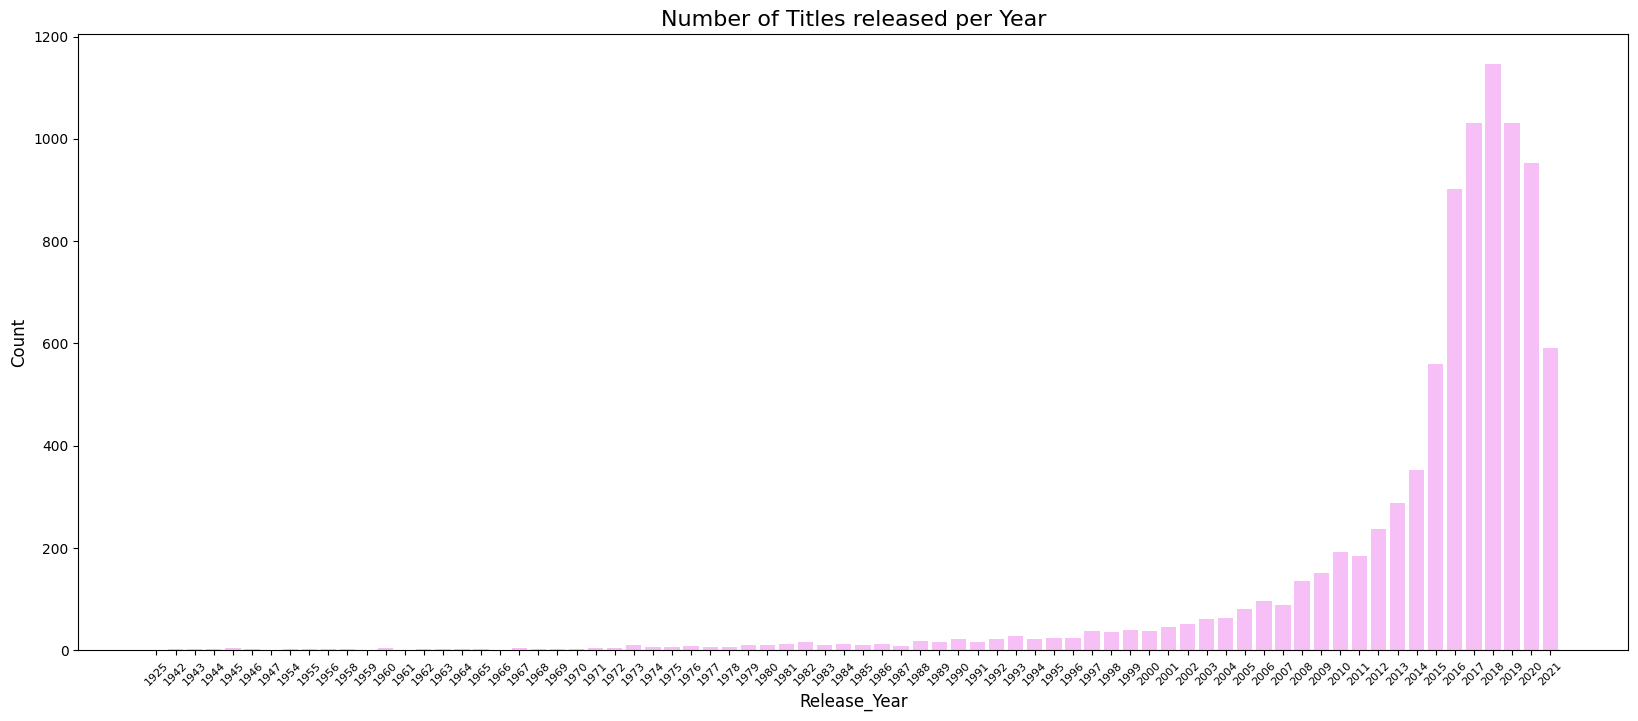

In [844]:
titles_released_count.sort_index(inplace = True)
x_bar = titles_released_count.index
y_bar = titles_released_count.values


plt.figure(figsize = (20,8))
plt.bar(x_bar, y_bar,color = 'violet', alpha = 0.5)
plt.xticks(rotation = 45, fontsize = 8)
plt.xlabel("Release_Year", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Number of Titles released per Year", fontsize = 16)
plt.show()

In [845]:
data['release_month'].value_counts()

January    8804
Name: release_month, dtype: int64

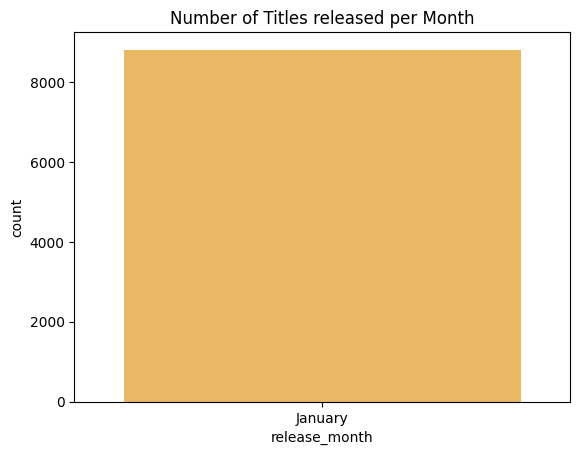

In [846]:
sns.countplot(data = data, x = 'release_month', color = 'orange', alpha = 0.7)

plt.title("Number of Titles released per Month")
plt.show()

* The maximum number of titles released on the year 2018 followed by the year 2017 and 2019.
* All the titles are released on the month January.
* The number of titles released has very less before 1980 and then has gradually increased through the years from 1980 to 2018 and again fell down after 2018 to 2021. In 2021 the number of titles became almost half from the year 2018.

#### e. Titles vs. Date_added:

In [847]:
data['year_added'].value_counts()
titles_added_per_year = data['year_added'].value_counts()
titles_added_per_year

2019    2016
2020    1879
2018    1649
2021    1498
2017    1187
2016     427
2015      82
2014      24
2011      13
2013      11
2012       3
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

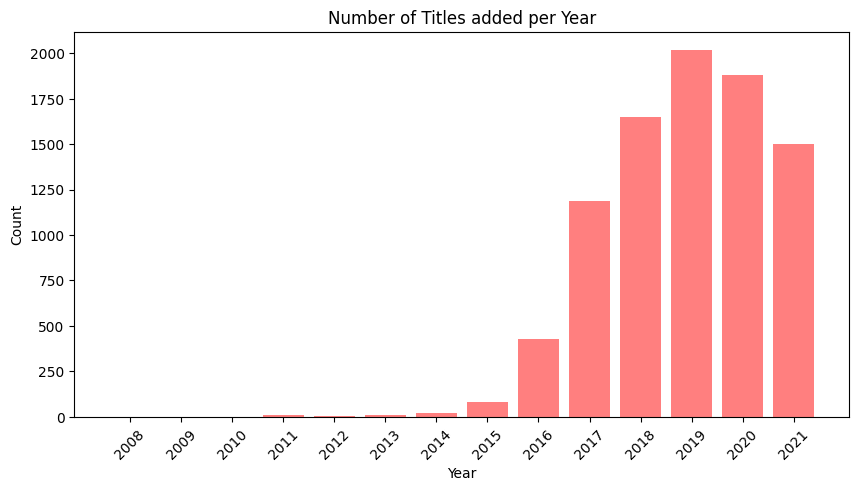

In [848]:
titles_added_per_year.sort_index(inplace = True)
x_bar = titles_added_per_year.index
y_bar = titles_added_per_year.values


plt.figure(figsize = (10,5))
plt.bar(x_bar, y_bar,color = 'red', alpha = 0.5)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Titles added per Year")
plt.show()

* Before 2010 no titles has been added to netflix. Then the number of titles increases through the years from 2010 to 2019 and maximum number of titles has been added to netflix in the year 2019 and then the number decreased.

In [849]:
titles_added_per_month = data['month_added'].value_counts()
titles_added_per_month

July         827
December     813
September    769
April        763
October      760
August       754
March        742
January      738
June         728
November     705
May          632
February     563
Name: month_added, dtype: int64

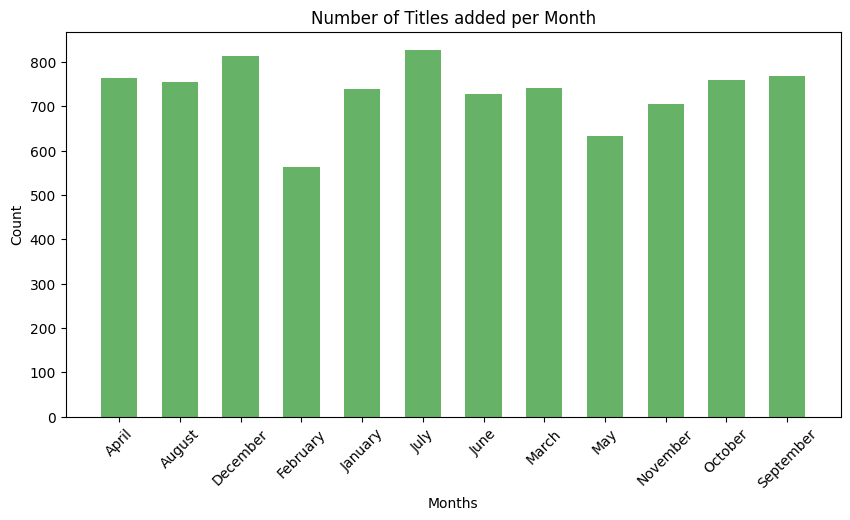

In [850]:
titles_added_per_month.sort_index(inplace = True)
x_bar = titles_added_per_month.index
y_bar = titles_added_per_month.values

plt.figure(figsize = (10,5))
plt.bar(x_bar, y_bar,color = 'g', alpha = 0.6, width = 0.6)
plt.xticks(rotation = 45, fontsize = 10)
plt.xlabel("Months")
plt.ylabel("Count")
plt.title("Number of Titles added per Month")

plt.show()

* The maximum number of movies have added to netflix in the month July, December.
* The minimum number of movies added to netflix in the month February.

In [851]:
titles_added_per_month = data[data['year_added'].isin(['2017','2018','2019','2020','2021'])][['month_added']].value_counts()
titles_added_per_month

month_added
July           791
April          734
March          719
August         717
September      711
June           703
January        691
December       687
October        677
November       648
May            611
February       540
dtype: int64

In the years from 2017 to 2021,
* The maximum number of movies have added to netflix in the month July.
* The minimum number of movies added to netflix in the month February.

## 2. Comparison of Tv shows vs. Movies:

#### a. Country vs. Movies:

In [852]:
movies_per_country = df[df['type'] == 'Movie'].groupby(['country'])['title'].nunique().sort_values(ascending = False).reset_index()
movies_per_country.rename(columns = {'title':'movie_count'}, inplace = True)
movies_per_country

country  movie_count
0     United States         2748
1             India          962
2    United Kingdom          532
3               nan          440
4            Canada          319
..              ...          ...
118       Nicaragua            1
119       Palestine            1
120          Panama            1
121        Paraguay            1
122          Malawi            1

[123 rows x 2 columns]

In [853]:
movies_per_country[:10]

country  movie_count
0   United States         2748
1           India          962
2  United Kingdom          532
3             nan          440
4          Canada          319
5          France          303
6         Germany          182
7           Spain          171
8           Japan          119
9           China          114

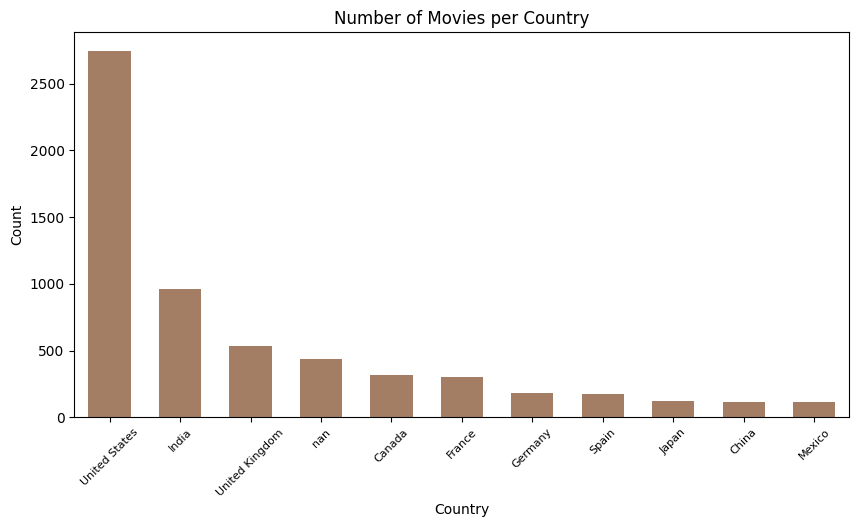

In [854]:
plt.figure(figsize = (10, 5))
sns.barplot(data = movies_per_country[0:11],
            x = 'country',
            y = 'movie_count',
            color = 'saddlebrown',
            alpha = 0.7,
            width = 0.6)

plt.xlabel("Country",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("Number of Movies per Country",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

* The maximum number of movies produced in the country United States.
* Other countries with high number of movies are India, UK, Canada, France.

#### b. Country vs. TV Shows:

In [855]:
TV_Shows_per_country = df[df['type'] == 'TV Show'].groupby(['country'])['title'].nunique().sort_values(ascending = False).reset_index()
TV_Shows_per_country.rename(columns = {'title':'TV_Show_count'}, inplace = True)
TV_Shows_per_country

country  TV_Show_count
0    United States            938
1              nan            391
2   United Kingdom            272
3            Japan            199
4      South Korea            170
..             ...            ...
62       Mauritius              1
63         Senegal              1
64     Puerto Rico              1
65         Hungary              1
66                              1

[67 rows x 2 columns]

In [856]:
TV_Shows_per_country[:10]

country  TV_Show_count
0   United States            938
1             nan            391
2  United Kingdom            272
3           Japan            199
4     South Korea            170
5          Canada            126
6          France             90
7           India             84
8          Taiwan             70
9       Australia             66

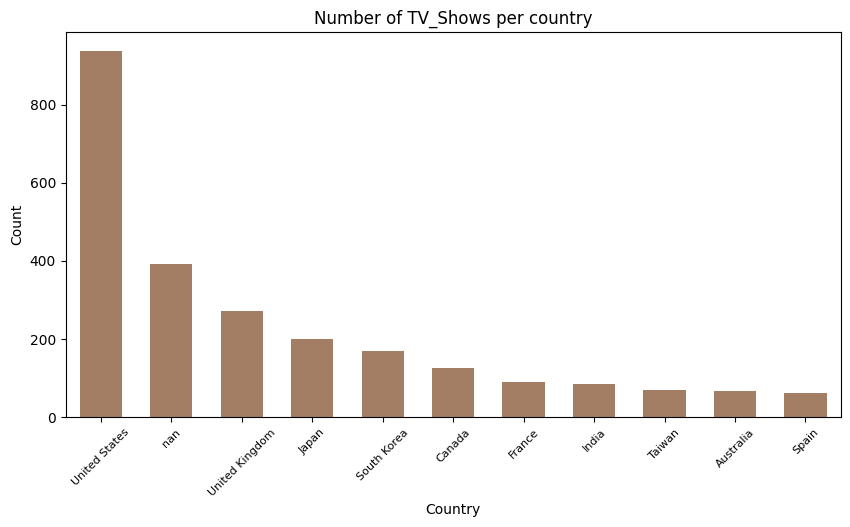

In [857]:
plt.figure(figsize = (10, 5))
sns.barplot(data = TV_Shows_per_country[0:11],
            x = 'country',
            y = 'TV_Show_count',
            color = 'saddlebrown',
            alpha = 0.7,
            width = 0.6)

plt.xlabel("Country",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("Number of TV_Shows per country",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

* The maximum number of TV Shows produced in the country United States.
* Other countries with high number of TV Shows are UK, Japan, South Korea, Canada, France.

## 3. The best time to launch a TV show:

##### Note: 
In the ISO week numbering system (ISO 8601 standard), a year has 52 or 53 weeks. Week 52 represents the last complete week of the year, and Week 53 occurs in years where the first day of the year (January 1st) falls on a Thursday or a leap year where it falls on a Wednesday. Week 53 includes days from the end of the previous year and may extend into the first days of the new year.

#### a. Best week to release the TV-shows/Movies:

In [858]:
# Extracting the week from the column 'release_date' and save to the column 'release_week'

data['release_week'] = data['release_date'].dt.isocalendar().week

In [859]:
# number of movies released per week

data.loc[data['type'] == 'Movie',['release_week']].value_counts()

release_week
1               3557
52              1305
53              1266
dtype: int64

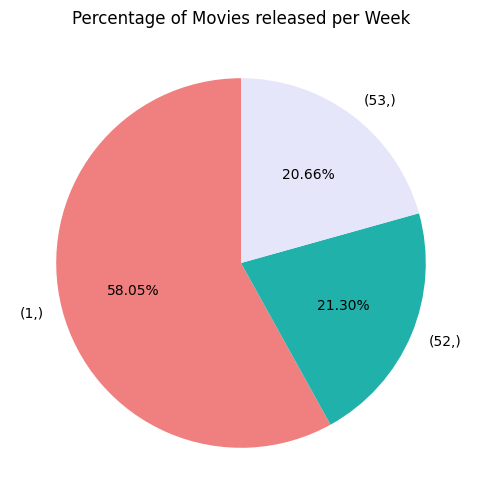

In [860]:
plt.figure(figsize = (8,6))

plt.pie(data.loc[data['type'] == 'Movie',['release_week']].value_counts(),
       labels = data.loc[data['type'] == 'Movie',['release_week']].value_counts().index,
       startangle = 90,
       autopct = f"%1.2f%%",
       colors=['lightcoral','lightseagreen', 'lavender'])

plt.title("Percentage of Movies released per Week")
plt.show()

* 58.05% of movies have released in the first week of the year, 21.30% of movies have released in the 52 week of the year, 20.66% of movies have released in the 53 week of the year.

In [861]:
# number of TV Shows released per week

data.loc[data['type'] == 'TV Show',['release_week']].value_counts()

release_week
1               1656
53               626
52               394
dtype: int64

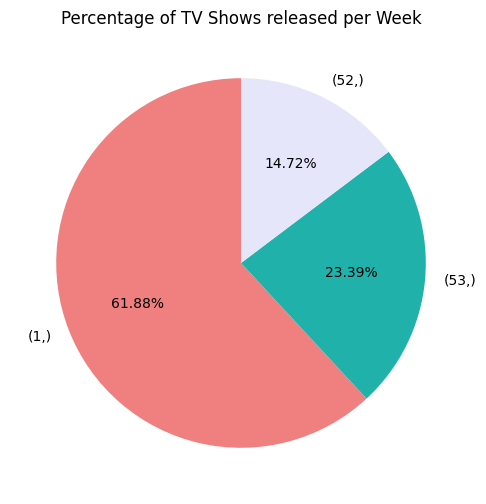

In [862]:
plt.figure(figsize = (8,6))

plt.pie(data.loc[data['type'] == 'TV Show',['release_week']].value_counts(),
       labels = data.loc[data['type'] == 'TV Show',['release_week']].value_counts().index,
       startangle = 90,
       autopct = f"%1.2f%%",
       colors=['lightcoral','lightseagreen', 'lavender'])
plt.title("Percentage of TV Shows released per Week")
plt.show()

* 61.88% of TV Shows have released in the first week of the year, 23.39% of TV Shows have released in the 52 week of the year, 14.72% of TV Shows have released in the 53 week of the year.

#### b. Best month to release the Tv-shows/Movies:

In [863]:
# number of movies released per month

data.loc[data['type'] == 'Movie',['release_month']].value_counts()

release_month
January          6128
dtype: int64

In [864]:
# number of movies added per month

data.loc[data['type'] == 'Movie', ['month_added']].value_counts()

month_added
July           565
April          549
December       547
January        546
October        545
March          529
August         518
September      518
November       498
June           492
May            439
February       382
dtype: int64

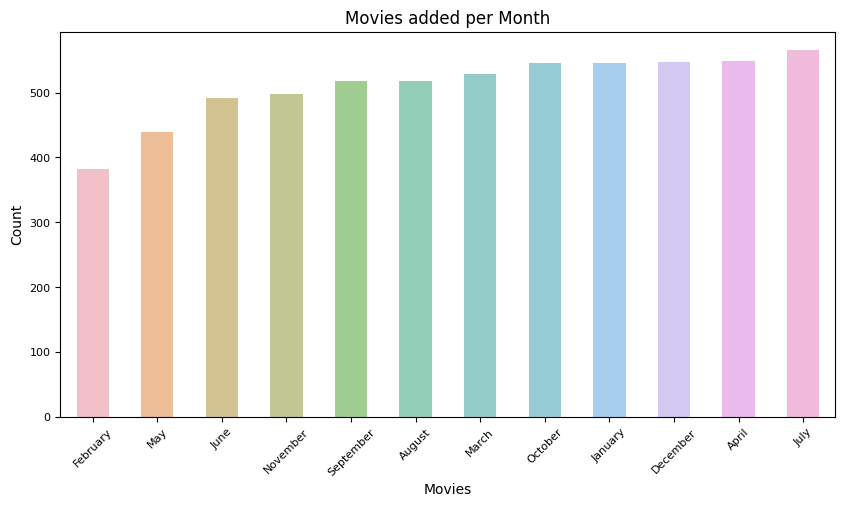

In [865]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data,
              x = data[data['type'] == 'Movie']['month_added'],
              order = data[data['type'] == 'Movie']['month_added'].value_counts().sort_values().index,
              alpha = 0.6,
              width = 0.5)

plt.xlabel("Movies",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("Movies added per Month",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

* All the movies have released in the month of January in every year.
* The maximum number of movies have been added to netflix in the month of July and minimum number of movies have been added in the month of Febrary.

In [866]:
# number of TV Shows released per month

data.loc[data['type'] == 'TV Show',['release_month']].value_counts()

release_month
January          2676
dtype: int64

In [867]:
# number of TV Shows added per month

data.loc[data['type'] == 'TV Show', ['month_added']].value_counts()

month_added
December       266
July           262
September      251
August         236
June           236
October        215
April          214
March          213
November       207
May            193
January        192
February       181
dtype: int64

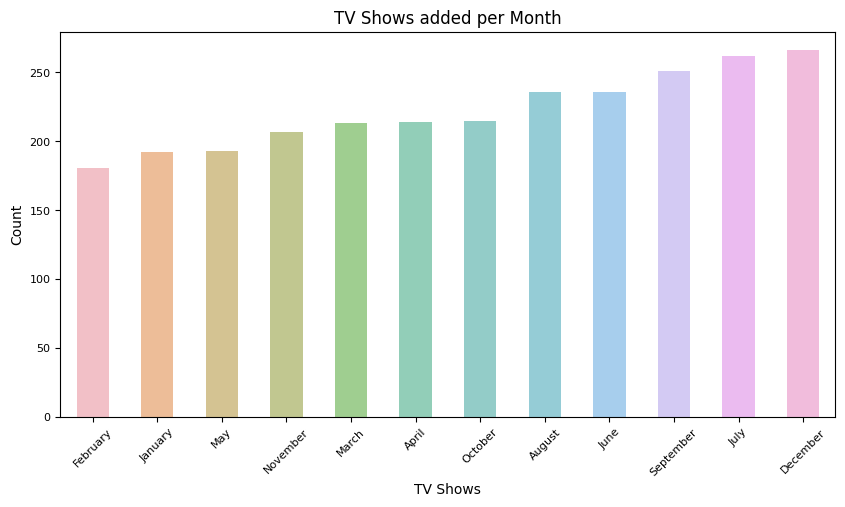

In [868]:
plt.figure(figsize = (10, 5))
sns.countplot(data = data,
              x = data[data['type'] == 'TV Show']['month_added'],
              order = data[data['type'] == 'TV Show']['month_added'].value_counts().sort_values().index,
              alpha = 0.6,
              width = 0.5)

plt.xlabel("TV Shows",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("TV Shows added per Month",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

* All the TV Shows have released in the month of January in every year.
* The maximum number of TV Shows have been added to netflix in the month of December & July and minimum number of movies have been added in the month of Febrary.

## 4. Analysis of Actors/Directors of different types of TV Shows/Movies:

#### a. Top Directors for Movies/Tv-shows:

In [869]:
titles_per_director = df.groupby(['director'])['title'].nunique().sort_values(ascending = False).reset_index()
titles_per_director.rename(columns = {'title':'title_count'}, inplace = True)
titles_per_director

director  title_count
0                         nan         2634
1               Rajiv Chilaka           22
2                   Jan Suter           21
3                 Raúl Campos           19
4                 Suhas Kadav           16
...                       ...          ...
4988         Jovanka Vuckovic            1
4989            Bradley Walsh            1
4990               Juan Antin            1
4991  Juan Antonio de la Riva            1
4992        María Jose Cuevas            1

[4993 rows x 2 columns]

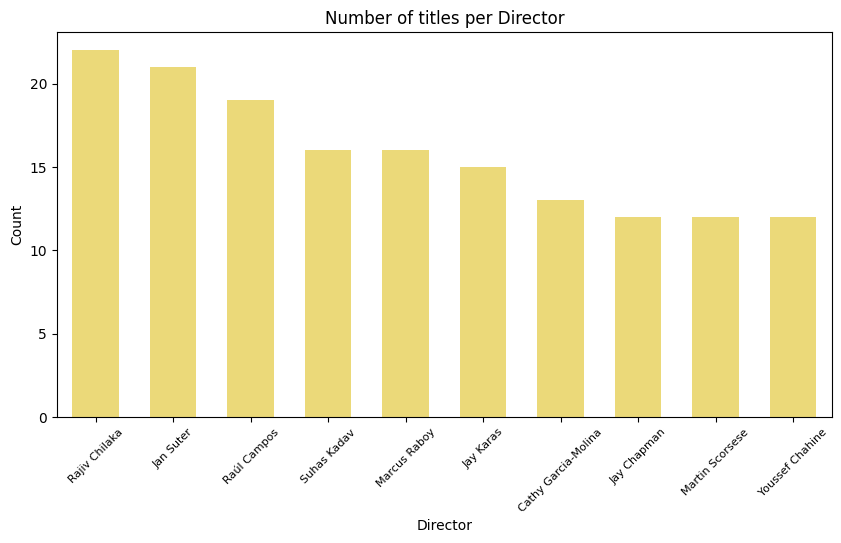

In [870]:
plt.figure(figsize = (10, 5))
sns.barplot(data = titles_per_director[1:11],
            x = 'director',
            y = 'title_count',
            color = 'gold',
            alpha = 0.6,
            width = 0.6)

plt.xlabel("Director",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("Number of titles per Director",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

* There are 4993 number of known directors in the dataset.
* The top 3 directors Rajiv Chilaka, Jan Suter, Raúl Campos have directed maximum number of titles.

In [871]:
movies_per_director = df[df['type'] == 'Movie'].groupby(['director'])['title'].nunique().sort_values(ascending = False).reset_index()
movies_per_director.rename(columns = {'title':'movie_count'}, inplace = True)
movies_per_director

director  movie_count
0                       nan          188
1             Rajiv Chilaka           22
2                 Jan Suter           21
3               Raúl Campos           19
4               Suhas Kadav           16
...                     ...          ...
4772  José Miguel Contreras            1
4773            José Ortuño            1
4774           Bob Odenkirk            1
4775       Jovanka Vuckovic            1
4776           Mary Lambert            1

[4777 rows x 2 columns]

* There are 4777 number of known directors in the dataset who directed movies.
* The top 3 directors Rajiv Chilaka, Jan Suter, Raúl Campos have directed maximum number of movies.

In [872]:
TV_Shows_per_director = df[df['type'] == 'TV Show'].groupby(['director'])['title'].nunique().sort_values(ascending = False).reset_index()
TV_Shows_per_director.rename(columns = {'title':'TV_Show_count'}, inplace = True)
TV_Shows_per_director

director  TV_Show_count
0                    nan           2446
1              Ken Burns              3
2    Alastair Fothergill              3
3             Jung-ah Im              2
4          Joe Berlinger              2
..                   ...            ...
295      Houda Benyamina              1
296          Hong Won-ki              1
297     Hiroyuki Seshita              1
298          Hikaru Toda              1
299        Kim Seong-hun              1

[300 rows x 2 columns]

* There are 300 number of known directors in the dataset who directed TV Shows.
* The top 3 directors Ken Burns, Alastair Fothergill, Stan Lathan have directed maximum number of TV Shows.

#### a. Top Actors for Movies/Tv-shows:

In [873]:
titles_per_actor = df.groupby(['cast'])['title'].nunique().sort_values(ascending = False).reset_index()
titles_per_actor.rename(columns = {'title':'title_count'}, inplace = True)
titles_per_actor

cast  title_count
0                   nan          825
1           Anupam Kher           43
2        Shah Rukh Khan           35
3         Julie Tejwani           33
4      Takahiro Sakurai           32
...                 ...          ...
36435         Jamie Lee            1
36436       Jamie Kenna            1
36437       Jamie Kaler            1
36438    Jamie Johnston            1
36439      Ṣọpẹ́ Dìrísù            1

[36440 rows x 2 columns]

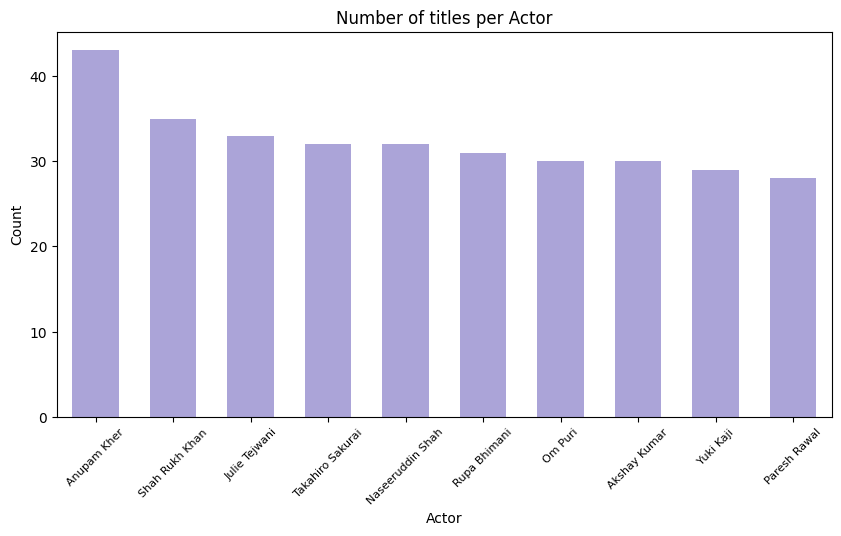

In [874]:
plt.figure(figsize = (10, 5))
sns.barplot(data = titles_per_actor[1:11],
            x = 'cast',
            y = 'title_count',
            color = 'slateblue',
            alpha = 0.6,
            width = 0.6)

plt.xlabel("Actor",fontsize = 10)
plt.ylabel("Count",fontsize = 10)
plt.title("Number of titles per Actor",fontsize = 12)
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

* There are 36440 number of known actors in the dataset.
* The top 3 actors Anupam Kher, Shah Rukh Khan, Julie Tejwani have acted in maximum number of titles.

In [875]:
movies_per_actor = df[df['type'] == 'Movie'].groupby(['cast'])['title'].nunique().sort_values(ascending = False).reset_index()
movies_per_actor.rename(columns = {'title':'movie_count'}, inplace = True)
movies_per_actor

cast  movie_count
0                   nan          475
1           Anupam Kher           42
2        Shah Rukh Khan           35
3      Naseeruddin Shah           32
4          Akshay Kumar           30
...                 ...          ...
25947       Jacob Blair            1
25948    Jacob Bertrand            1
25949     Jacob Batalon            1
25950      Jacob Artist            1
25951      Ṣọpẹ́ Dìrísù            1

[25952 rows x 2 columns]

* There are 25952 number of known actors in the dataset who acted in movies.
* The top 3 actors Anupam Kher, Shah Rukh Khan, Naseeruddin Shah have acted in maximum number of movies.

In [876]:
TV_Shows_per_actor = df[df['type'] == 'TV Show'].groupby(['cast'])['title'].nunique().sort_values(ascending = False).reset_index()
TV_Shows_per_actor.rename(columns = {'title':'TV_Show_count'}, inplace = True)
TV_Shows_per_actor

cast  TV_Show_count
0                        nan            350
1           Takahiro Sakurai             25
2                  Yuki Kaji             19
3                Daisuke Ono             17
4                  Ai Kayano             17
...                      ...            ...
14859                Ivy Yin              1
14860          Iván Pellicer              1
14861  Iván Álvarez de Araya              1
14862            Iza Moreira              1
14863         Şükrü Özyıldız              1

[14864 rows x 2 columns]

* There are 14864 number of known actors in the dataset who acted in TV Shows.
* The top 3 actors Takahiro Sakurai, Yuki Kaji, Junichi Suwabe have acted in maximum number of TV Shows.

## 5. Finding which genre titles are more popular or produced more:

In [877]:
titles_per_genre = df.groupby(['genre'])['title'].nunique().sort_values(ascending = False).reset_index()
titles_per_genre.rename(columns = {'title':'title_count'}, inplace = True)
titles_per_genre

genre  title_count
0           International Movies         2752
1                         Dramas         2427
2                       Comedies         1674
3         International TV Shows         1351
4                  Documentaries          869
5             Action & Adventure          859
6                      TV Dramas          763
7             Independent Movies          756
8       Children & Family Movies          641
9                Romantic Movies          616
10                   TV Comedies          581
11                     Thrillers          577
12                Crime TV Shows          470
13                      Kids' TV          451
14                    Docuseries          395
15              Music & Musicals          375
16             Romantic TV Shows          370
17                 Horror Movies          357
18               Stand-Up Comedy          343
19                    Reality TV          255
20              British TV Shows          253
21              Sci-Fi & Fantasy          243
22                 Sports Movies          219
23                  Anime Series          176
24     Spanish-Language TV Shows          174
25         TV Action & Adventure          168
26               Korean TV Shows          151
27                Classic Movies          116
28                  LGBTQ Movies          102
29                  TV Mysteries           98
30           Science & Nature TV           92
31           TV Sci-Fi & Fantasy           84
32                     TV Horror           75
33                Anime Features           71
34                   Cult Movies           71
35                 Teen TV Shows           69
36          Faith & Spirituality           65
37                  TV Thrillers           57
38  Stand-Up Comedy & Talk Shows           56
39                        Movies           54
40             Classic & Cult TV           28
41                      TV Shows           16

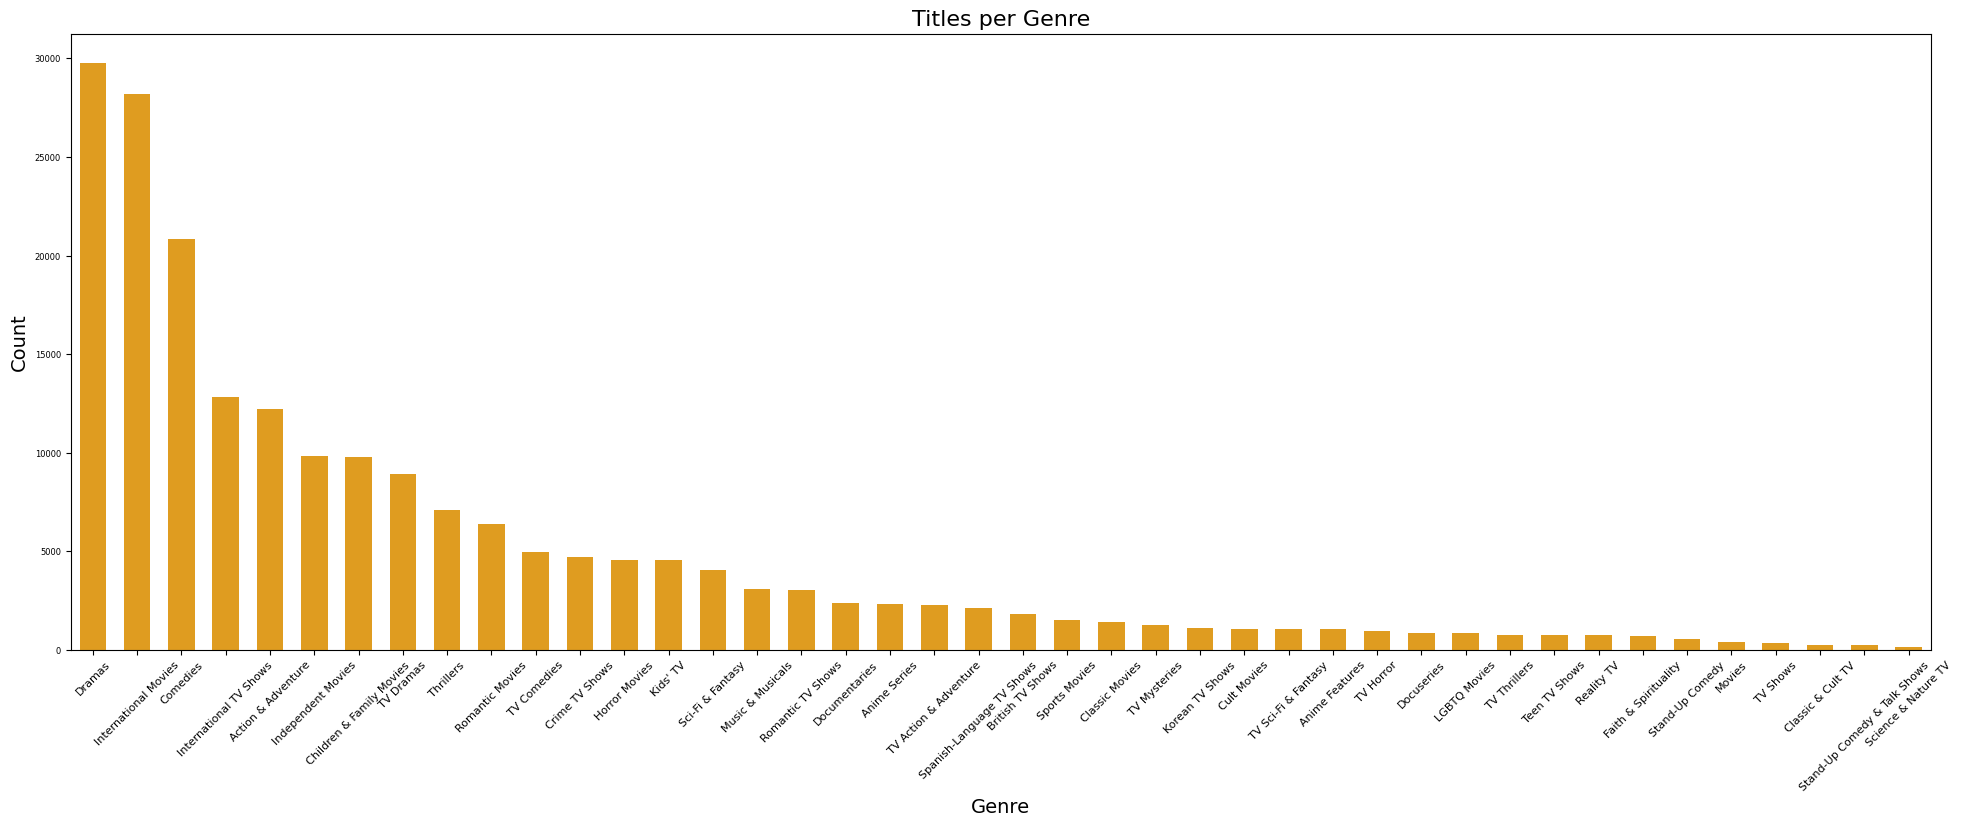

In [878]:
plt.figure(figsize =(24,8))
sns.countplot(data = df,
              x = "genre",
              order = df['genre'].value_counts().index,
              color = 'orange',
              width = 0.6)

plt.xlabel("Genre",fontsize = 14)
plt.ylabel("Count",fontsize = 14)
plt.title("Titles per Genre",fontsize = 16)
plt.xticks(rotation = 45, fontsize = 8)
plt.yticks(fontsize = 6)
plt.show()

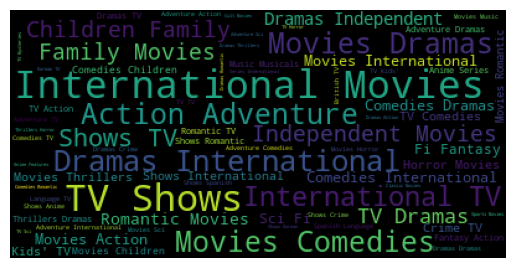

In [879]:
from wordcloud import WordCloud

text = ' '.join(df['genre'])
word_cloud = WordCloud().generate(text)

# Generate plot
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

* The maximum number of titles belongs to genres of International Movies, Dramas, Comedies, International TV Shows, Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies.

#### a. Genre vs. Movies:

In [880]:
movies_per_genre = df[df['type'] == 'Movie'].groupby(['genre'])['title'].nunique().sort_values(ascending = False).reset_index()
movies_per_genre.rename(columns = {'title':'movie_count'}, inplace = True)
movies_per_genre

genre  movie_count
0       International Movies         2752
1                     Dramas         2427
2                   Comedies         1674
3              Documentaries          869
4         Action & Adventure          859
5         Independent Movies          756
6   Children & Family Movies          641
7            Romantic Movies          616
8                  Thrillers          577
9           Music & Musicals          375
10             Horror Movies          357
11           Stand-Up Comedy          343
12          Sci-Fi & Fantasy          243
13             Sports Movies          219
14            Classic Movies          116
15              LGBTQ Movies          102
16               Cult Movies           71
17            Anime Features           71
18      Faith & Spirituality           65
19                    Movies           54

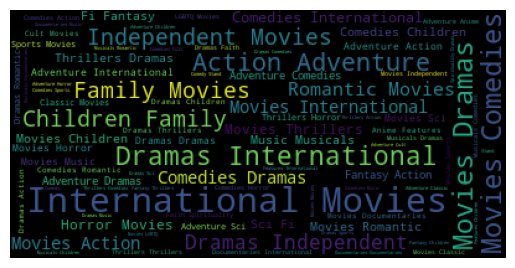

In [881]:
from wordcloud import WordCloud

text = ' '.join(df[df['type'] == 'Movie']['genre'])
word_cloud = WordCloud().generate(text)

# Generate plot
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

* The genres like International Movies, Dramas, Comedies have high popularity in movies.
* The genres like Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers have medium popularity in movies.
* The genres like Cult Movies, Anime Features, Faith & Spirituality, Movies	have very low popularity in movies.

#### b. Genre vs. TV Shows:

In [882]:
TV_Shows_per_genre = df[df['type'] == 'TV Show'].groupby(['genre'])['title'].nunique().sort_values(ascending = False).reset_index()
TV_Shows_per_genre.rename(columns = {'title':'TV_Shows_count'}, inplace = True)
TV_Shows_per_genre

genre  TV_Shows_count
0         International TV Shows            1351
1                      TV Dramas             763
2                    TV Comedies             581
3                 Crime TV Shows             470
4                       Kids' TV             451
5                     Docuseries             395
6              Romantic TV Shows             370
7                     Reality TV             255
8               British TV Shows             253
9                   Anime Series             176
10     Spanish-Language TV Shows             174
11         TV Action & Adventure             168
12               Korean TV Shows             151
13                  TV Mysteries              98
14           Science & Nature TV              92
15           TV Sci-Fi & Fantasy              84
16                     TV Horror              75
17                 Teen TV Shows              69
18                  TV Thrillers              57
19  Stand-Up Comedy & Talk Shows              56
20             Classic & Cult TV              28
21                      TV Shows              16

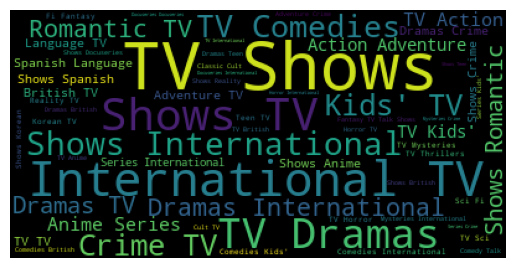

In [883]:
from wordcloud import WordCloud

text = ' '.join(df[df['type'] == 'TV Show']['genre'])
word_cloud = WordCloud().generate(text)

# Generate plot
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

* In the TV Shows, the genres like International TV Shows, TV Dramas, TV Comedies have high popularity.
* In the TV Shows, the genres like Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows have medium popularity.
* In the TV Shows, the genres like Classic & Cult TV, TV Shows have very low popularity.

## 6. Finding After how many days the movie will be added to Netflix after the release of the movie:

In [884]:
# creating a new column by subtracting the column 'release_date' from the columns 'date added' and save it to 'days'

data['days'] = (data['date_added'] - data['release_date']).dt.days

In [885]:
data['days'].mode()

0    334.0
Name: days, dtype: float64

In [886]:
# getting the number of titles added per number of days

titles_added = data['days'].value_counts().reset_index()
titles_added.rename(columns = {'index':'days', 'days':'title_count'}, inplace = True)
titles_added

days  title_count
0      334.0           37
1      639.0           35
2      546.0           35
3      364.0           30
4      578.0           28
...      ...          ...
2706   685.0            1
2707  4339.0            1
2708   688.0            1
2709  1426.0            1
2710  5123.0            1

[2711 rows x 2 columns]

* The number of titles added to Netflix after 334 days from the release_date.

In [887]:
# getting the number of movies added per number of days

movies_added = data[data['type'] == 'Movie']['days'].value_counts().reset_index()
movies_added.rename(columns = {'index':'days', 'days':'movie_count'}, inplace = True)
movies_added

days  movie_count
0      334.0           29
1      546.0           28
2      424.0           26
3      365.0           23
4      639.0           22
...      ...          ...
2366  3715.0            1
2367  1525.0            1
2368  2266.0            1
2369  1538.0            1
2370  5123.0            1

[2371 rows x 2 columns]

* The maximum number of movies added to Netflix mostly after 334 days from the release_date and most of the movies added to Netflix between 200 to 700 days after release.

In [888]:
# getting the number of TV Shows added per number of days

TV_Shows_added = data[data['type'] == 'TV Show']['days'].value_counts().reset_index()
TV_Shows_added.rename(columns = {'index':'days', 'days':'TV_Shows_count'}, inplace = True)
TV_Shows_added

days  TV_Shows_count
0      364.0              16
1      578.0              14
2      639.0              13
3      273.0              12
4      219.0              11
...      ...             ...
1115  2130.0               1
1116  3591.0               1
1117  5052.0               1
1118  1398.0               1
1119   986.0               1

[1120 rows x 2 columns]

 * The maximum number of TV Shows added to Netflix after 364 days from the release_date.

# Insights:


* There are total 8804 number of titles out of which 6128(69.6%) are movies and 2676(30.4%) are TV Shows.


* The top 5 ratings are TV-MA, TV-14, R, TV-PG, PG-13 for movies and the top 5 ratings are TV-MA, TV_14, TV-PG, TV-Y7, TV-Y for TV Shows.

* Out of total movies, 33% of the movies have rating TV-MA(Mature Audience only) which is highest in number, 23% of movies have rating TV-14(unsuitable for children under age 14) , 12% have rating R(restricted), 8% of movies have rating TV-PG(parental guidance is recommended).


* Out of total TV Shows, 42% of the TV Shows have rating TV-MA(Mature Audience only) which is highest in number, 27% of TV Shows have rating TV-14(unsuitable for children under age 14) ,12% have rating TV-PG(parental guidance is recommended), 7% have rating TV-Y7(appropriate for children of all ages).


* Duration for Movies are in miutes and there are 205 different type of durations for movies.Maximum number of movies have durations between 90-97 minutes.The maximum and minimum duration of movies are 312 and 3 minutes respectively.


* Duration for TV Shows are in seasons and there are 15 different type of durations for TV Shows.1 Season TV Shows are highest in number. 2 Seasons TV Shows are almost 1/4th of the number of 1 season TV Shows and 3 seasons TV Shows are almost half of the number of 2 seasons TV Shows.There are maximum and minimum duration for TV Shows are 17 seasons and 1 season respectively.

* The maximum number of titles released on the year 2018.All the titles are released on the month January.
* The number of titles released has very less before 1980 and then has gradually increased through the years from 1980 to 2018 and again fell down after 2018 to 2021. In 2021 the number of titles became almost half from the year 2018.

* Before 2010 no titles has been added to netflix.Then the number of titles increased through the years from 2010 to 2019 and maximum number of titles has been added to netflix in the year 2019 and then the number decreased.


* There are 128 countries in the dataset.
* The maximum number of movies produced in the country United States.Other countries with high number of movies are India, UK, Canada, France.
* The maximum number of TV Shows produced in the country United States.Other countries with high number of TV Shows are UK, Japan, South Korea, Canada, France.

* All the Movies have been released in the month of January in every year.The maximum number of movies have been added to netflix in the month of July and minimum number of movies have been added in the month of Febrary.

* All the TV Shows have been released in the month of January in every year.The maximum number of TV Shows have been added to netflix in the month of December & July and minimum number of movies have been added in the month of Febrary.

* 58.05% of movies have released in the first week of the year, 21.30% of movies have released in the 52 week of the year, 20.66% of movies have released in the 53 week of the year.

* 61.88% of TV Shows have released in the first week of the year, 23.39% of TV Shows have released in the 52 week of the year, 14.72% of TV Shows have released in the 53 week of the year.

* There are 4777 number of directors in the dataset who directed movies and the top 3 directors for Movies are Rajiv Chilaka, Jan Suter, Raúl Campos.
* There are 300 number of directors in the dataset who directed TV Shows and the top 3 directors for TV Shows are Ken Burns, Alastair Fothergill and Stan Lathan.

* There are 25952 number of actors in the dataset who acted in movies and the top 3 actors for Movies are Anupam Kher, Shah Rukh Khan and Naseeruddin Shah.
* There are 14864 number of actors in the dataset who acted in TV Shows and the top 3 actors for TV Shows are Takahiro Sakurai, Yuki Kaji and Junichi Suwabe.

* In the Movies, the genres like International Movies, Dramas, Comedies have high popularity, the genres like Documentaries, Action & Adventure, Independent Movies, Children & Family Movies, Romantic Movies, Thrillers have medium popularity and the genres like Cult Movies, Anime Features, Faith & Spirituality, Movies have very low popularity.

* In the TV Shows, the genres like International TV Shows, TV Dramas, TV Comedies have high popularity, the genres like Crime TV Shows, Kids' TV, Docuseries, Romantic TV Shows, Reality TV, British TV Shows have medium popularity and the genres like Classic & Cult TV, TV Shows have very low popularity.

* The maximum number of movies added to Netflix mostly after 334 days and the maximum number of TV Shows added to Netflix after 364 days from the release_date.


# Recommendations:

* The number of top rated Movies/TV Shows should be added to Netflix. The Movies/TV Shows having less duration should be given more preference.

* Netflix can improve and personalize the recommendation system to suggest content that is more likely to engage and retain users.

* Netflix can provide free trial for 30 days to make customers used to it.This way we can get more new subscribers. 
* For old users we can give some percentage of discount on subscription charges to retain them.

* We have to stay updated on industry trends and competitors.This can help Netflix to make right decisions about where to invest and how to adapt to changing market conditions.

* The Movies/TV Shows can be added early after release so that people will show interest to take the subscription of Netflix.

* Monitor and analyze user feedback and reviews to understand pain points and areas for improvement in your service.Create and promote original content that can set Netflix apart from competitors.

* The number of Movies/TV Shows of popular Actor/Directors should be increased in the Netflix platform.